@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import piecewise_regression

from reg import quicklook, break_regression


path = f"data{os.sep}"
filename = "phys_data_2023-03-12_side0.csv"

In [2]:
df = pd.read_csv(f"{path}{filename}", parse_dates=True, index_col="TimeUTC")

In [3]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,E1,E2,E3,E4,E5,E6,E7,DT,PA
TimeUTC,,,,,,,,,,,,,,,,,,
2023-03-12 00:00:00,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,11.40,0.0,0.0,0.000,0.000,0.00,86.490453
2023-03-12 00:00:24,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0144,167.0,0.0,7.58,0.0,0.0,0.000,0.000,0.00,81.321720
2023-03-12 00:00:48,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0,0.627,0.000,0.00,69.690026
2023-03-12 00:01:12,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,112.0,17.6,0.00,0.0,0.0,0.313,0.000,0.00,70.727876
2023-03-12 00:01:36,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,55.8,0.0,0.00,0.0,0.0,0.000,0.000,0.00,68.520445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:58:00,61.2,7.14,3.95,3.42,1.590,0.000,0.142,0.0671,0.0144,7090.0,2200.0,865.00,325.0,10.5,0.314,0.000,1.29,100.899747
2023-03-14 23:58:24,24.5,14.30,9.88,5.70,1.590,0.954,0.142,0.0671,0.0000,5030.0,1920.0,819.00,309.0,21.0,0.000,0.088,1.12,84.530333
2023-03-14 23:58:48,61.2,21.40,9.89,2.28,1.590,0.000,0.142,0.0671,0.0000,6480.0,2360.0,895.00,262.0,16.8,0.314,0.000,1.46,95.456014


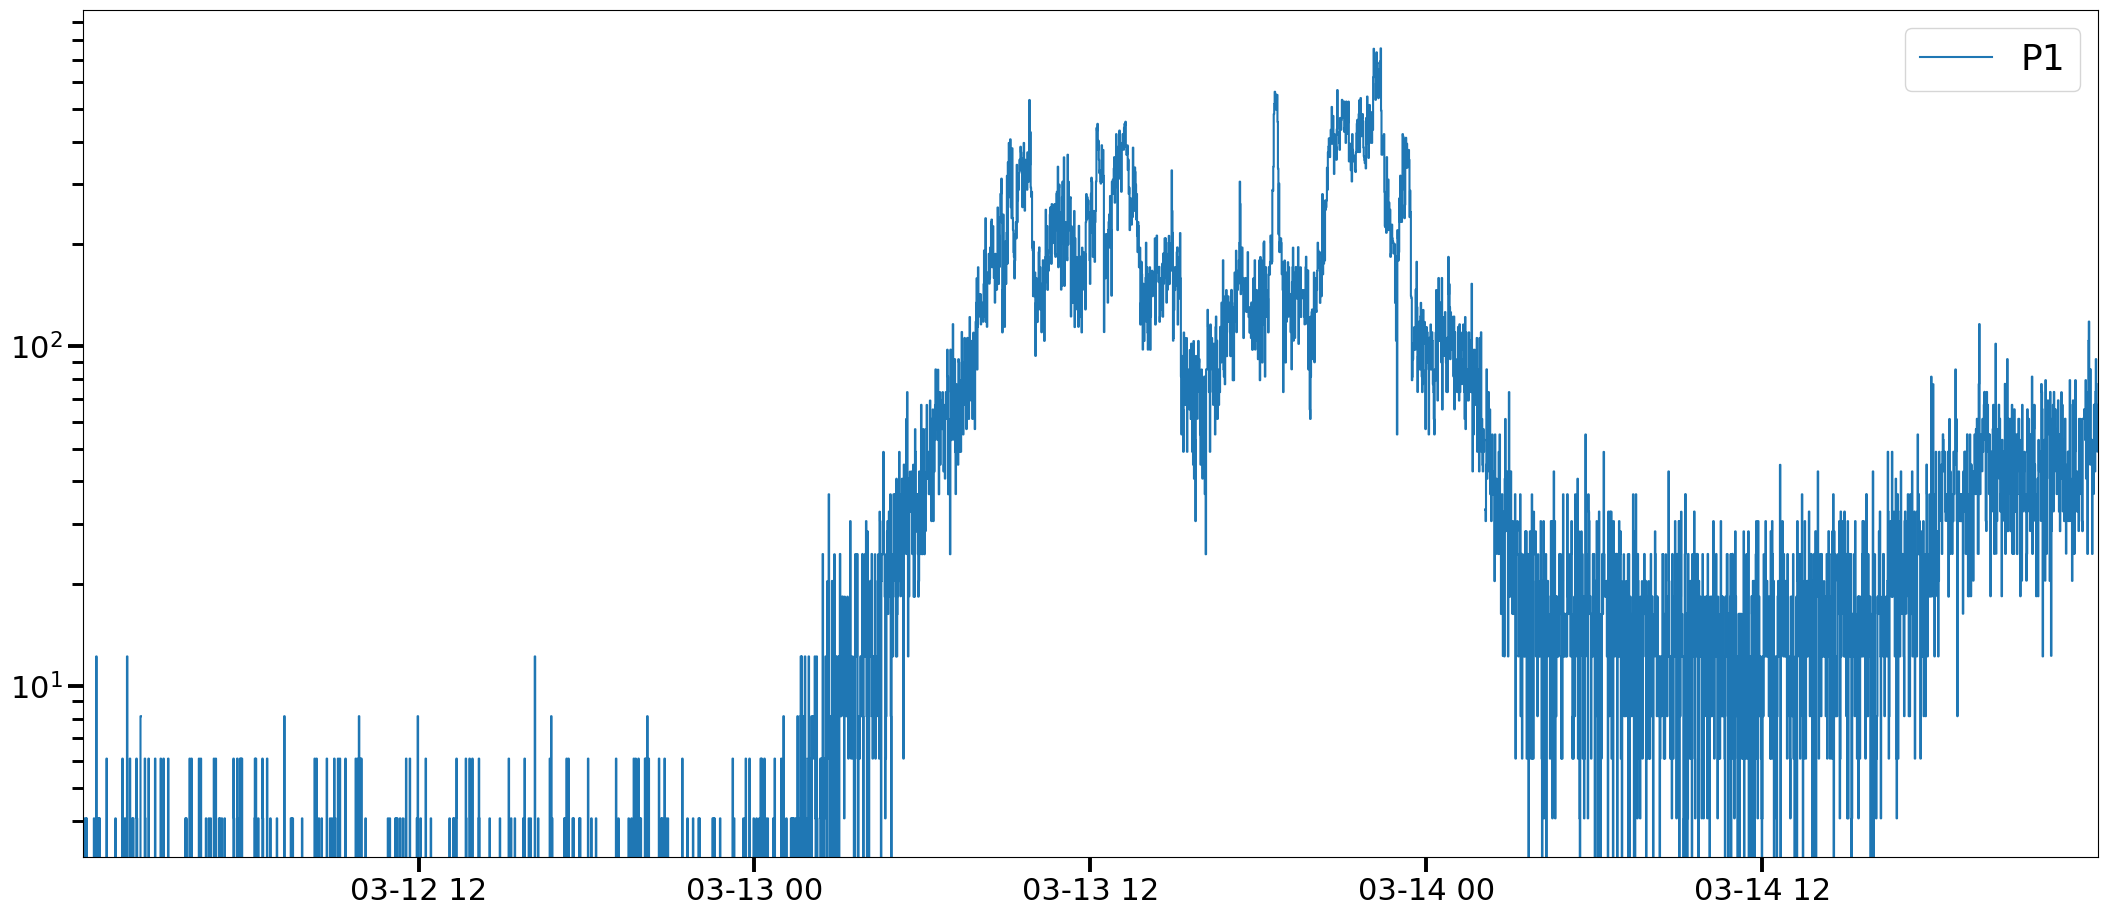

In [4]:
quicklook(data=df, channel="P1", resample="1 min")

### piecewise-regression testing:

In [5]:
# The slope of the first line
alpha_1 = 0.5

# The slope of the second line
alpha_2 = 7

# The constant factor of the first line alpha_1 * x + C
constant = 12

# The point at which the gradient changes from alpha_1 to alpha_2
breakpoint_1 = 11

# The number of data points in consideration
n_points = 2000

# Setting the random seed for reproductibility
np.random.seed(0)

# The x-axis values, i.e., the independent variable
xx = np.linspace(0, 20, n_points)

# The dependent variable
yy = constant + alpha_1*xx + (alpha_2-alpha_1) * np.maximum(xx - breakpoint_1, 0) + np.random.normal(size=n_points)


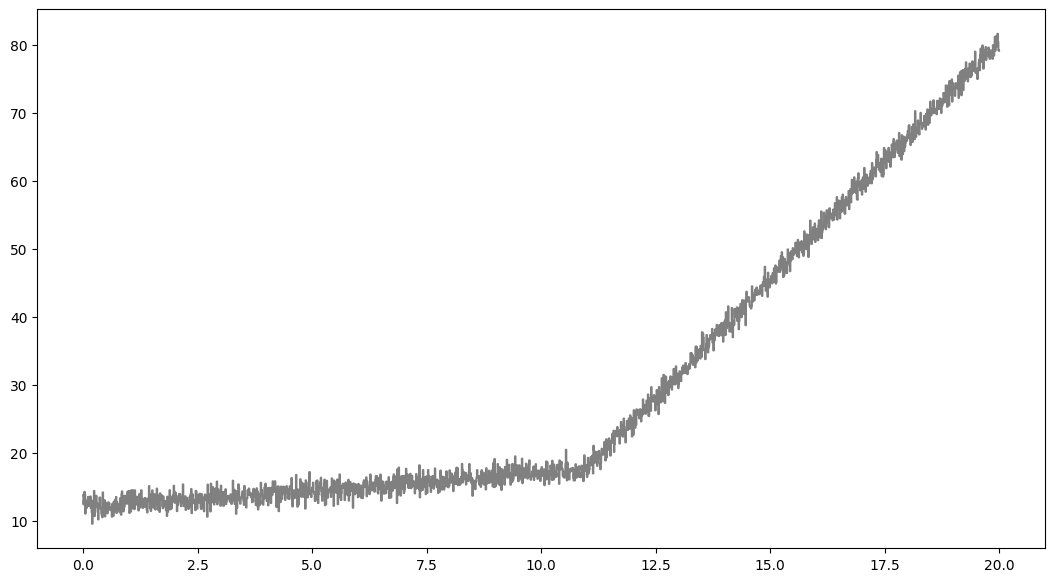

In [6]:
# Prepare the figure visualizing the data
fig, ax = plt.subplots(figsize=(13,7))

ax.step(xx,yy, where="mid", c="grey")
#ax.scatter(xx,yy)

plt.show()

In [7]:
# Given some data, fit the model
pw_fit = piecewise_regression.Fit(xx, yy, start_values=[5], n_breakpoints=1)

# Print a summary of the fit
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                     2000
No. Model Parameters                    4
Degrees of Freedom                   1996
Res. Sum of Squares               1910.35
Total Sum of Squares          8.84751e+05
R Squared                        0.997841
Adjusted R Squared               0.997836
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                11.9589        0.059       202.67           0.0       11.843       12.075
alpha1              0.499759      0.00931        53.68           0.0       0.4815      0.51802
beta1                6.48542       0.0156       416.02             -       6.4548        6.516
breakpoint1          10.9804       0.0136            -             -       10.954       11.007
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                     2000\nNo. Model Parameters                    4\nDegrees of Freedom                   1996\nRes. Sum of Squares               1910.35\nTotal Sum of Squares          8.84751e+05\nR Squared                        0.997841\nAdjusted R Squared               0.997836\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                11.9589        0.059       202.67           0.0       11.

In [8]:
# Get the key results of the fit
pw_results = pw_fit.get_results()
pw_estimates = pw_results["estimates"]

In [9]:
pw_results

{'davies': 0.0,
 'estimates': {'const': {'estimate': 11.95892145068034,
   'se': 0.059007610826463185,
   'confidence_interval': (11.84319848553212, 12.074644415828558),
   't_stat': 202.66744040613,
   'p_t': 0.0},
  'beta1': {'estimate': 6.485421536556528,
   'se': 0.01558903155915342,
   'confidence_interval': (6.454849057336519, 6.515994015776537),
   't_stat': 416.0246588729548,
   'p_t': '-'},
  'breakpoint1': {'estimate': 10.980420870967645,
   'se': 0.013557487007679007,
   'confidence_interval': (10.953832561857807, 11.007009180077484),
   't_stat': '-',
   'p_t': '-'},
  'alpha1': {'estimate': 0.4997592260207653,
   'se': 0.00930991848222239,
   'confidence_interval': (0.4815010495421506, 0.5180174024993799),
   't_stat': 53.68030095806668,
   'p_t': 0.0},
  'alpha2': {'estimate': 6.9851807625772935,
   'se': 0.012503732355047243,
   'confidence_interval': (6.960659027782756, 7.009702497371831),
   't_stat': 558.6476552945139,
   'p_t': 0.0}},
 'bic': -61.32164004391645,
 'rs

In [10]:
pw_estimates

{'const': {'estimate': 11.95892145068034,
  'se': 0.059007610826463185,
  'confidence_interval': (11.84319848553212, 12.074644415828558),
  't_stat': 202.66744040613,
  'p_t': 0.0},
 'beta1': {'estimate': 6.485421536556528,
  'se': 0.01558903155915342,
  'confidence_interval': (6.454849057336519, 6.515994015776537),
  't_stat': 416.0246588729548,
  'p_t': '-'},
 'breakpoint1': {'estimate': 10.980420870967645,
  'se': 0.013557487007679007,
  'confidence_interval': (10.953832561857807, 11.007009180077484),
  't_stat': '-',
  'p_t': '-'},
 'alpha1': {'estimate': 0.4997592260207653,
  'se': 0.00930991848222239,
  'confidence_interval': (0.4815010495421506, 0.5180174024993799),
  't_stat': 53.68030095806668,
  'p_t': 0.0},
 'alpha2': {'estimate': 6.9851807625772935,
  'se': 0.012503732355047243,
  'confidence_interval': (6.960659027782756, 7.009702497371831),
  't_stat': 558.6476552945139,
  'p_t': 0.0}}

In [11]:
# Extract the results of fitting
estimated_const = pw_estimates["const"]["estimate"]
estimated_alpha_1 = pw_estimates["alpha1"]["estimate"]
estimated_alpha_2 = pw_estimates["alpha2"]["estimate"]

estimated_breakpoint = pw_estimates["breakpoint1"]["estimate"]
breakpoint_errs = pw_estimates["breakpoint1"]["confidence_interval"]

In [12]:
# Construct lines to show on the plot
line1 = xx*estimated_alpha_1 + estimated_const
line2 = xx*estimated_alpha_2 + np.nanmax(line1) - np.nanmax(yy)

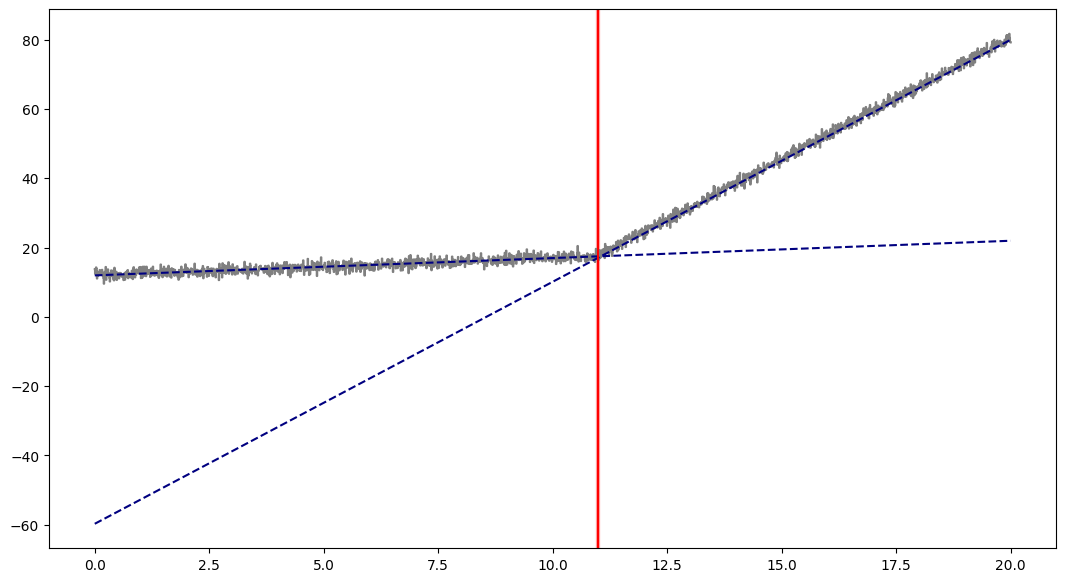

In [13]:
# Plot the estimated values
ax.plot(xx, line1, ls="--", c="navy")
ax.plot(xx, line2, ls="--", c="navy")

ax.axvspan(xmin=breakpoint_errs[0], xmax=breakpoint_errs[1], alpha=0.25, color="red")
ax.axvline(x=estimated_breakpoint, c="red")

fig

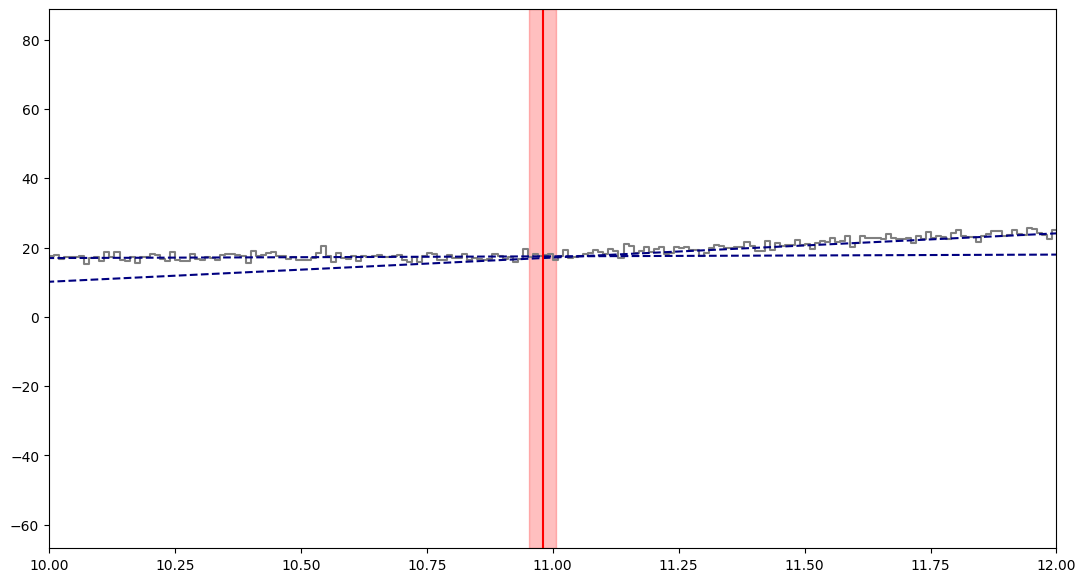

In [14]:
ax.set_xlim(10,12)
fig

In [38]:
# Try the same but now with the P1 channel of previously downloaded data

In [44]:
def search_first_peak(ints, window=None, threshold=None):
    """
    Searches for a local maximum for a given window.

    ints : {array-like}
    
    window : {int}
    
    threshold : {float}
    """

    # Check that there are no nans
    if np.isnan(ints).any():
        raise ValueError("NaN values are not permitted!")

    # Default window length is 30 data points
    if window is None:
        window = 30

    # Default threshold value is very small
    if threshold is None:
        max_val = -1e5
    else:
        max_val = threshold

    warnings = 0
    threshold_hit = False
    for idx, val in enumerate(ints):

        # Just do nothing until we hit threshold
        if val < threshold and not threshold_hit:
            warnings = 0
            continue

        if val >= max_val:
            threshold_hit = True
            max_val = val
            warnings = 0
        else:
            warnings += 1

        if warnings == window:
            max_idx = idx-window
            return max_val, max_idx

    # If the peak was not found, return False and False
    return False, False

In [17]:
# Intensities of P1 channel
ints = np.log10(df["P1"])
times = df.index.values
indices = np.linspace(start=0, stop=len(times)-1, num=len(times))

/home/chospa/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
# First replace inf values with nan
ints.replace([np.inf, -np.inf], np.nan, inplace=True)
filled_ints = ints.bfill()

In [42]:
filled_ints

TimeUTC
2023-03-12 00:00:00    1.086360
2023-03-12 00:00:24    1.086360
2023-03-12 00:00:48    1.086360
2023-03-12 00:01:12    1.086360
2023-03-12 00:01:36    1.086360
                         ...   
2023-03-14 23:58:00    1.786751
2023-03-14 23:58:24    1.389166
2023-03-14 23:58:48    1.786751
2023-03-14 23:59:12    1.689309
2023-03-14 23:59:36    1.786751
Name: P1, Length: 10800, dtype: float64

In [53]:
first_peak, first_peak_idx = search_first_peak(ints=filled_ints, threshold=2.5, window=100)
print(first_peak)
print(first_peak_idx)

2.8356905714924254
5073


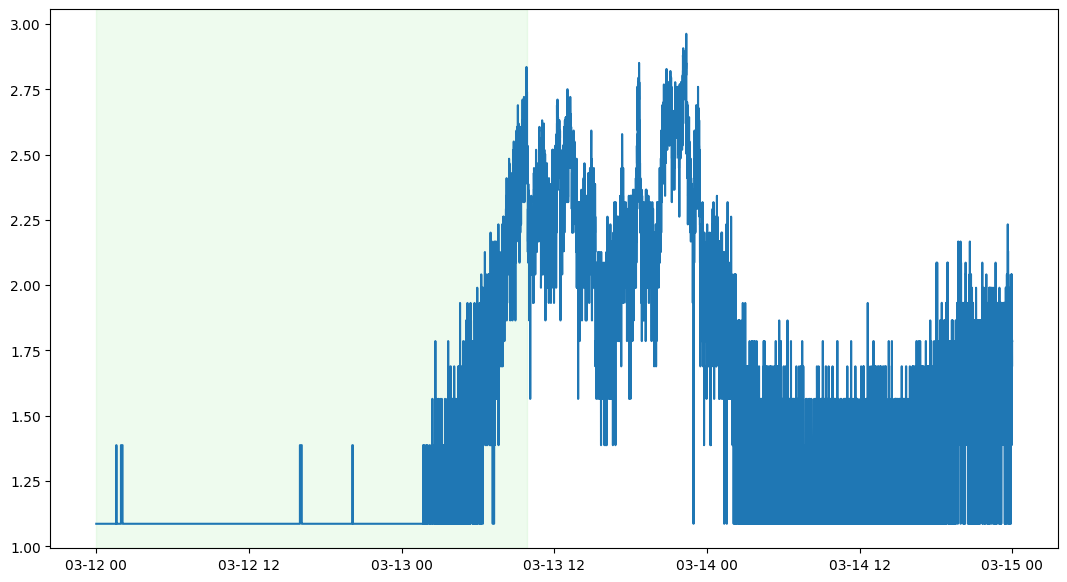

In [54]:
fig1, ax1 = plt.subplots(figsize=(13,7))

ax1.step(times, filled_ints)

ax1.axvspan(xmin=times[0], xmax=times[first_peak_idx], alpha=0.08, color="limegreen")

plt.show()

In [57]:
# Apply selection until the first peak
indices_sel = indices[:first_peak_idx]
ints_sel = filled_ints[:first_peak_idx]

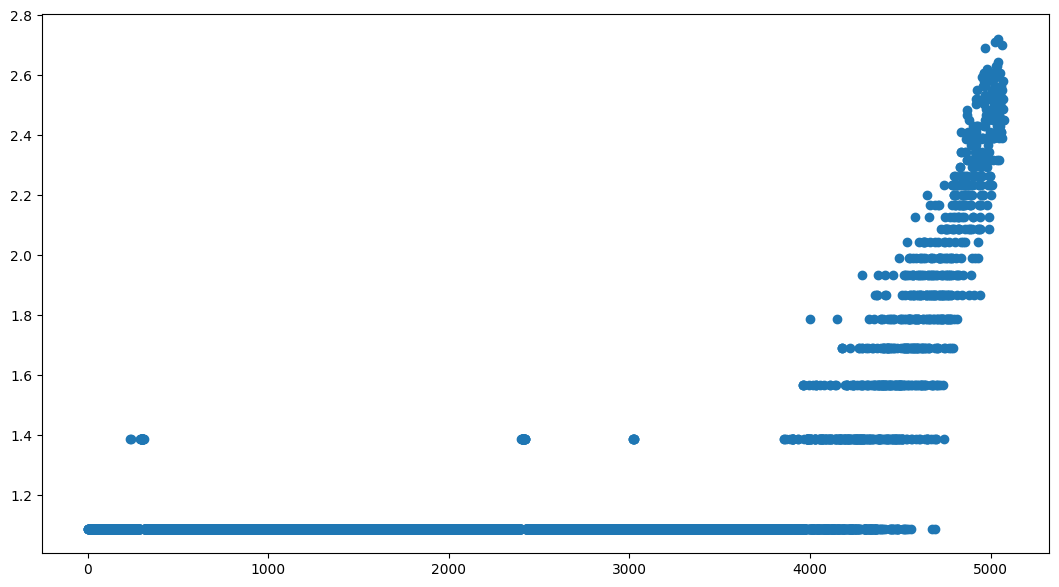

In [87]:
fig2, ax2 = plt.subplots(figsize=(13,7))

#ax2.step(indices_sel, ints_sel)
ax2.scatter(indices_sel, ints_sel.values)

plt.show()

In [66]:
# Fit the model
p1_fit = piecewise_regression.Fit(indices_sel, ints_sel.values, start_values=[5], n_breakpoints=1)

# Print a summary of the fit
p1_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                     5073
No. Model Parameters                    4
Degrees of Freedom                   5069
Res. Sum of Squares               53.4328
Total Sum of Squares              555.791
R Squared                        0.903862
Adjusted R Squared               0.903786
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                1.07827      0.00318        339.2           0.0        1.072       1.0845
alpha1           9.33084e-06     1.32e-06       7.0672       1.8e-12   6.7425e-06   1.1919e-05
beta1             0.00149793     1.32e-05       113.52             -    0.0014721    0.0015238
breakpoint1          4170.31         5.03            -             -       4160.4       4180.2
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                     5073\nNo. Model Parameters                    4\nDegrees of Freedom                   5069\nRes. Sum of Squares               53.4328\nTotal Sum of Squares              555.791\nR Squared                        0.903862\nAdjusted R Squared               0.903786\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                1.07827      0.00318        339.2           0.0        1.

In [81]:
# The results of fitting
p1_res = p1_fit.get_results()
p1_estimates = p1_res["estimates"]

# Extract the results of fitting
p1_const = p1_estimates["const"]["estimate"]
p1_alpha_1 = p1_estimates["alpha1"]["estimate"]
p1_alpha_2 = p1_estimates["alpha2"]["estimate"]

p1_breakpoint = p1_estimates["breakpoint1"]["estimate"]
p1_breakpoint_errs = p1_estimates["breakpoint1"]["confidence_interval"]

# Construct lines to show on the plot
p1_line1 = indices_sel*p1_alpha_1 + p1_const
p1_line2 = indices_sel*p1_alpha_2 + np.nanmax(p1_line1) #- np.nanmax(ints_sel.values)

In [83]:
def generate_fit_lines(indices, const, alpha1, alpha2, breakpoint):
    """
    Generates two lines from fit parameters.
    
    Parameters:
    ----------
    indices : {array-like}
    const : {float}
    alpha1 : {float}
    alpha2 : {float}
    breakpoint : {float}

    Returns:
    --------
    line1 : {pd.Series} the first line until breakpoint.
    line2 : {pd.Series} the second line from breakpoint to first peak.
    """

    # Working with indices, the breaking point of the two lines must
    # be an integer
    bp_int = int(breakpoint)

    indices_sel1 = indices[:bp_int]
    indices_sel2 = indices[bp_int:]

    line1 = indices_sel1 * alpha1 + const

    if alpha1 > 0:
        line2 = indices_sel2 * alpha2 + np.nanmax(line1)
    else:
        line2 = indices_sel2 * alpha2 - np.nanmax(line1)
    
    return pd.Series(line1, index=indices_sel1), pd.Series(line2, index=indices_sel2)

In [88]:
p1_line1, p1_line2 = generate_fit_lines(indices=indices_sel, const=p1_const,
                                       alpha1=p1_alpha_1, alpha2=p1_alpha_2,
                                       breakpoint=p1_breakpoint)

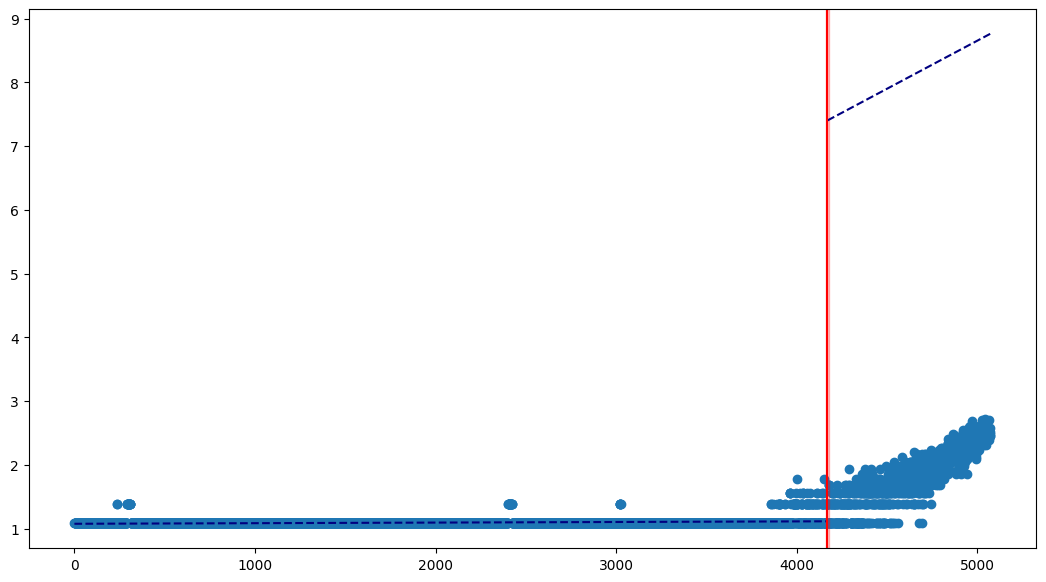

In [89]:
# Plot the fit results on the real data
ax2.plot(p1_line1.index, p1_line1.values, ls="--", c="navy")
ax2.plot(p1_line2.index, p1_line2.values, ls="--", c="navy")

ax2.axvspan(xmin=p1_breakpoint_errs[0], xmax=p1_breakpoint_errs[1], alpha=0.25, color="red")
ax2.axvline(x=p1_breakpoint, c="red")

fig2